In [94]:
import os
from utils import *
import optuna

In [95]:
data, usermap, itemmap, users = load_data2()
data_train, data_test, data_val=split_data2(data, 0.2, 0.2)

In [96]:
study_name = "rating+ranking"
study = optuna.create_study(
    study_name=study_name,
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 13:00:37,249] A new study created in memory with name: rating+ranking


In [97]:
from Evaluation.Evaluator import EvaluatorHoldout

cutoff_list=[5, 10, 15, 50, 100, 500, 1000]

evaluator_validation = EvaluatorHoldout(data_val, cutoff_list=cutoff_list)
evaluator_test = EvaluatorHoldout(data_test, cutoff_list=cutoff_list)

EvaluatorHoldout: Ignoring 2148 (17.0%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 2621 (20.7%) Users that have less than 1 test interactions


In [98]:
study_name = "P3Beta"
rp3beta_study = optuna.create_study(
    study_name=study_name,
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 13:00:37,298] A new study created in memory with name: P3Beta


In [99]:
#from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
#
#def objective(trial):
#    topK = trial.suggest_int('topK', 1, 1000) #da 1 a 100
#    alpha = trial.suggest_float('alpha', 0, 2) #da 0 a 0.3
#    beta = trial.suggest_float('beta', 0, 2) #da 0 a 0.3
#    implicit = trial.suggest_categorical('implicit', [True, False])
#    normalize_similarity = trial.suggest_categorical('normalize_similarity', [True, False])
#    
#    recommender = RP3betaRecommender(data_train, verbose=False)
#    recommender.fit(
#        topK=topK,
#        alpha=alpha,
#        beta=beta,
#        implicit=implicit,
#        normalize_similarity=normalize_similarity,
#    )
#    _, _, ev_map, _, _ = evaluator(recommender, data_train, data_val)
#    
#    return ev_map
#
#rp3beta_study.optimize(objective, n_trials=150)

In [100]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_recommender = RP3betaRecommender(data_train+data_val, verbose=False)
rp3beta_recommender.fit(topK=35, alpha=0.3598110596257423, beta=0.1558338653772352, implicit=True, normalize_similarity=True)

_, _, ev_map, _, _ = evaluator(rp3beta_recommender, data_train, data_val)

#p3beta [topK: 35, alpha: 0.3598110596257423, beta: 0.1558338653772352, implicit: True, normalize_similarity: True]

In [101]:
study_name = "Easer"
easer_study = optuna.create_study(
    study_name=study_name,
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 13:00:49,543] A new study created in memory with name: Easer


In [102]:
#from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender
#
#def objective(trial):
#    topK = trial.suggest_int('topK', 0, 1000)
#    l2_norm = trial.suggest_float('l2_norm', 1, 1e10, log=True)
#    
#    recommender = EASE_R_Recommender(data_train, verbose=False)
#    recommender.fit(
#        topK=topK if topK > 0 else None,
#        l2_norm=l2_norm,
#        normalize_matrix=False,
#    )
#    _, _, ev_map, _, _ = evaluator(recommender, data_train, data_val)
#    
#    return ev_map
#
#easer_study.optimize(objective, n_trials=150)

In [103]:
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender

easer_recommender = EASE_R_Recommender(data_train+data_val)
easer_recommender.fit(topK=72, l2_norm=36.47305040353163)

_, _, ev_map, _, _ = evaluator(easer_recommender, data_train, data_val)

#easer [topK: 72, l2_norm: 36.47305040353163]

EASE_R_Recommender: URM Detected 159 ( 1.3%) users with no interactions.
EASE_R_Recommender: URM Detected 75 ( 0.3%) items with no interactions.
EASE_R_Recommender: Fitting model... 
EASE_R_Recommender: Fitting model... done in 6.24 min


In [104]:
user_id=50

In [105]:
rp3beta_score = rp3beta_recommender._compute_item_score(user_id).flatten()
rp3beta_score

array([0.       , 0.0690456, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [106]:
easer_score = easer_recommender._compute_item_score(user_id).flatten()
easer_score

array([0.        , 0.07168306, 0.05269902, ..., 0.00683491, 0.        ,
       0.        ])

C:\Users\Francesco1\AppData\Local\Temp\ipykernel_18340\623488812.py:15: RuntimeWarning: divide by zero encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_18340\623488812.py:15: RuntimeWarning: invalid value encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta


[0.        0.0690456 0.        ... 0.        0.        0.       ] 0.21461649694520407 0.8364296635227412 0.21461649694520407 0.0


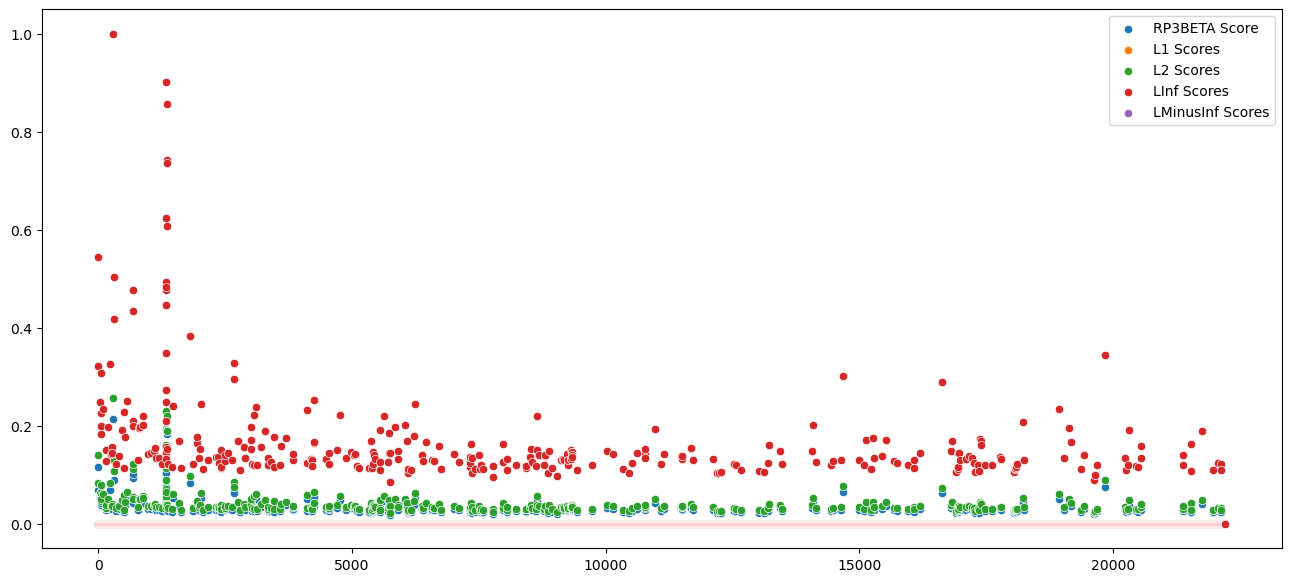

In [107]:
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt

l1_rp3beta = LA.norm([rp3beta_score], 1)
l1_rp3beta_scores = rp3beta_score / l1_rp3beta

l2_rp3beta = LA.norm([rp3beta_score], 2)
l2_rp3beta_scores = rp3beta_score / l2_rp3beta

linf_rp3beta = LA.norm(rp3beta_score, np.inf)
linf_rp3beta_scores = rp3beta_score / linf_rp3beta

lminusinf_rp3beta = LA.norm(rp3beta_score, -np.inf)
lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta

print(rp3beta_score, l1_rp3beta, l2_rp3beta, linf_rp3beta, lminusinf_rp3beta)

_ = plt.figure(figsize=(16,7))
ax = sns.scatterplot(data=rp3beta_score)
ax = sns.scatterplot(data=l1_rp3beta_scores) 
ax = sns.scatterplot(data=l2_rp3beta_scores) 
ax = sns.scatterplot(data=linf_rp3beta_scores) 
ax = sns.scatterplot(data=lminusinf_rp3beta_scores) 
ax.legend(["RP3BETA Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

[0.         0.07168306 0.05269902 ... 0.00683491 0.         0.        ] 40.2369935301841 1.4944106447306025 0.5162772016471626 0.0


C:\Users\Francesco1\AppData\Local\Temp\ipykernel_18340\176586920.py:11: RuntimeWarning: divide by zero encountered in divide
  lminusinf_easer_scores = easer_score / lminusinf_easer
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_18340\176586920.py:11: RuntimeWarning: invalid value encountered in divide
  lminusinf_easer_scores = easer_score / lminusinf_easer


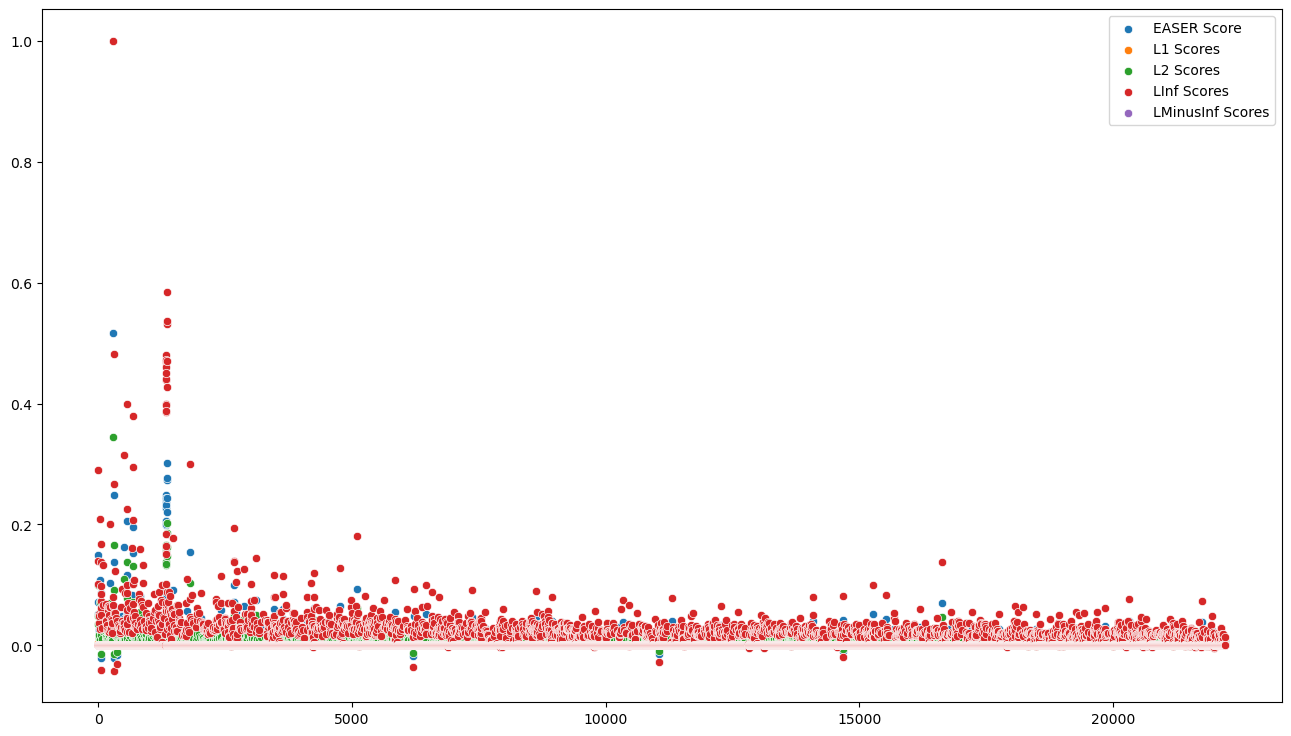

In [108]:
l1_easer = LA.norm(easer_score, 1)
l1_easer_scores = easer_score / l1_easer

l2_easer = LA.norm(easer_score, 2)
l2_easer_scores = easer_score / l2_easer

linf_easer = LA.norm(easer_score, np.inf)
linf_easer_scores = easer_score / linf_easer

lminusinf_easer = LA.norm(easer_score, -np.inf)
lminusinf_easer_scores = easer_score / lminusinf_easer

print(easer_score, l1_easer, l2_easer, linf_easer, lminusinf_easer)

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=easer_score)
ax = sns.scatterplot(data=l1_easer_scores) 
ax = sns.scatterplot(data=l2_easer_scores) 
ax = sns.scatterplot(data=linf_easer_scores) 
ax = sns.scatterplot(data=lminusinf_easer_scores) 
ax.legend(["EASER Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

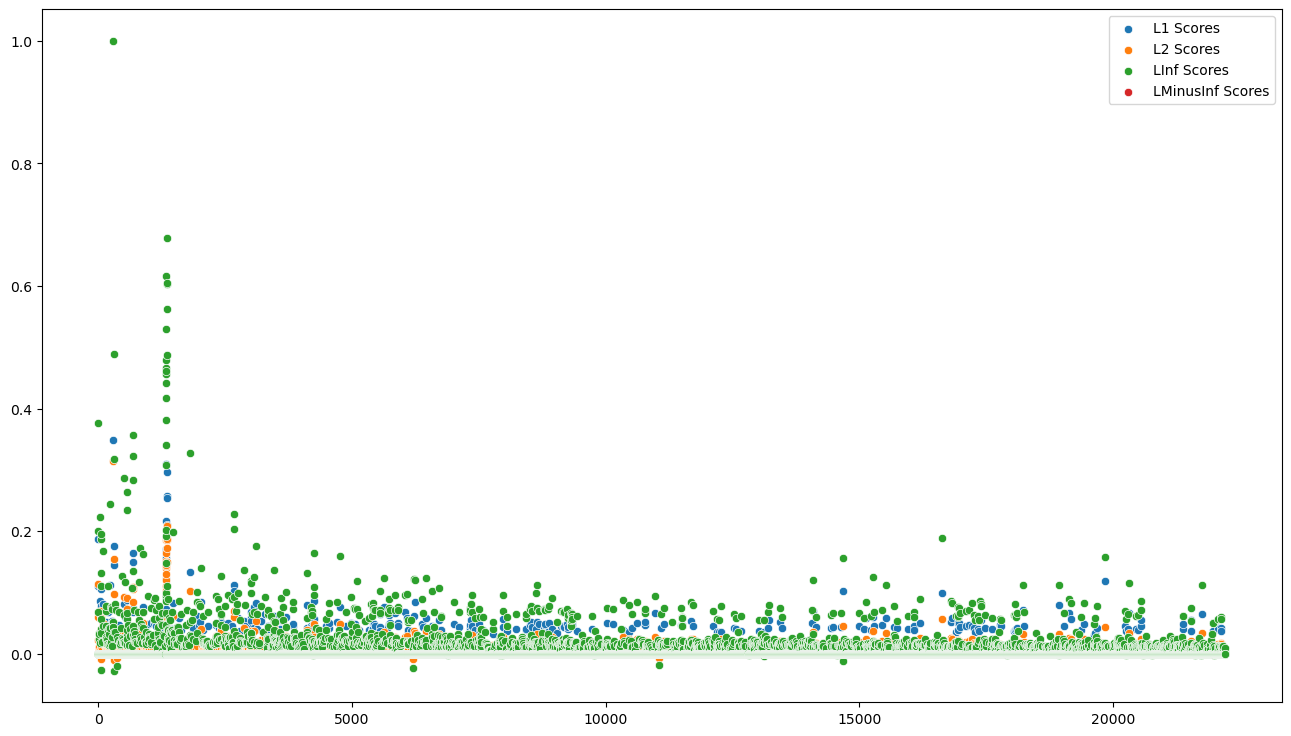

In [109]:
lambda_weights = 0.66

l1_new_scores = lambda_weights * l1_easer_scores + (1 - lambda_weights) * l1_rp3beta_scores
l2_new_scores = lambda_weights * l2_easer_scores + (1 - lambda_weights) * l2_rp3beta_scores
linf_new_scores = lambda_weights * linf_easer_scores + (1 - lambda_weights) * linf_rp3beta_scores
lminusinf_new_scores = lambda_weights * lminusinf_easer_scores + (1 - lambda_weights) * lminusinf_rp3beta_scores

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=l1_new_scores)
ax = sns.scatterplot(data=l2_new_scores) 
ax = sns.scatterplot(data=linf_new_scores) 
ax = sns.scatterplot(data=lminusinf_new_scores) 
ax.legend(["L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

In [118]:
from Recommenders.BaseRecommender import BaseRecommender
import scipy.sparse as sps

class DifferentLossScoresHybridRecommender(BaseRecommender):
    """ ScoresHybridRecommender
    Hybrid of two prediction scores R = R1/norm*alpha + R2/norm*(1-alpha) where R1 and R2 come from
    algorithms trained on different loss functions.

    """

    RECOMMENDER_NAME = "DifferentLossScoresHybridRecommender"


    def __init__(self, URM_train, recommender_1, recommender_2):
        super(DifferentLossScoresHybridRecommender, self).__init__(URM_train)

        self.URM_train = sps.csr_matrix(URM_train)
        self.recommender_1 = recommender_1
        self.recommender_2 = recommender_2
        
        
        
    def fit(self, norm, alpha = 0.5):

        self.alpha = alpha
        self.norm = norm


    def _compute_item_score(self, user_id_array, items_to_compute):
        
        item_weights_1 = self.recommender_1._compute_item_score(user_id_array)
        item_weights_2 = self.recommender_2._compute_item_score(user_id_array)

        norm_item_weights_1 = LA.norm(item_weights_1, self.norm)
        norm_item_weights_2 = LA.norm(item_weights_2, self.norm)
        
        
        if norm_item_weights_1 == 0:
            norm_item_weights_1 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 1 is zero. Avoiding division by zero".format(self.norm))
        
        if norm_item_weights_2 == 0:
            norm_item_weights_2 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 2 is zero. Avoiding division by zero".format(self.norm))
        
        item_weights = item_weights_1 / norm_item_weights_1 * self.alpha + item_weights_2 / norm_item_weights_2 * (1-self.alpha)

        return item_weights



In [119]:
recommender_object = DifferentLossScoresHybridRecommender(data_train, rp3beta_recommender, easer_recommender)

for norm in [1, 2, np.inf, -np.inf]:

    recommender_object.fit(norm, alpha = 0.66)

    result_df, _ = evaluator_validation.evaluateRecommender(recommender_object)
    print("Norm: {}, Result: {}".format(norm, result_df.loc[10]["MAP"]))

DifferentLossScoresHybridRecommender: URM Detected 469 ( 3.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 319 ( 1.4%) items with no interactions.
EvaluatorHoldout: Processed 10490 (100.0%) in 1.11 min. Users per second: 157
Norm: 1, Result: 0.14592293491912142
EvaluatorHoldout: Processed 10490 (100.0%) in 2.14 min. Users per second: 82
Norm: 2, Result: 0.14451498403619384
EvaluatorHoldout: Processed 10490 (100.0%) in 1.07 min. Users per second: 163
Norm: inf, Result: 0.1438018672356128
EvaluatorHoldout: Processed 10490 (100.0%) in 1.09 min. Users per second: 160
Norm: -inf, Result: 0.14015088822309857


In [112]:
#recommender_object = DifferentLossScoresHybridRecommender(data_train+data_val+data_test, rp3beta_recommender, easer_recommender)
#recommender_object.fit(2, alpha = 0.66)

In [121]:
#result_df, _ = evaluator_validation.evaluateRecommender(recommender_object)
#print("Norm: {}, Result: {}".format(2, result_df.loc[10]["MAP"]))
result_df

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
5,0.279009,0.374085,0.266333,0.209595,0.276368,0.477294,0.357547,0.272523,0.687703,0.706262,...,0.830036,0.570818,0.830036,0.114491,10.906625,0.998427,0.331823,0.840693,1.474302,0.188869
10,0.216511,0.415579,0.369039,0.140151,0.260872,0.49173,0.369424,0.272909,0.792564,0.80807,...,0.830036,0.657857,0.830036,0.14041,11.2868,0.998896,0.406943,0.869997,1.348269,0.381948
15,0.179708,0.454508,0.430475,0.106546,0.260775,0.494798,0.382628,0.253562,0.831268,0.849893,...,0.830036,0.689983,0.830036,0.162368,11.561146,0.999173,0.470583,0.891144,1.250328,0.579318
50,0.090301,0.601708,0.600126,0.041797,0.276153,0.497421,0.436274,0.156981,0.895043,0.917679,...,0.830036,0.742918,0.830036,0.271405,12.537286,0.999836,0.786603,0.966386,0.892247,2.033424
100,0.055757,0.687936,0.687795,0.022817,0.283664,0.497717,0.464664,0.103152,0.914871,0.932935,...,0.830036,0.759376,0.830036,0.355754,13.0753,1.000062,1.031065,1.007857,0.68476,4.213638
500,0.015202,0.826626,0.826626,0.004954,0.290682,0.497781,0.506113,0.029856,0.92307,0.943424,...,0.830036,0.766181,0.830036,0.522124,13.818358,1.000255,1.513251,1.065132,0.328698,22.763235
1000,0.008151,0.850157,0.850157,0.0025,0.291358,0.497782,0.513275,0.016147,0.923356,0.944238,...,0.830036,0.766419,0.830036,0.532066,13.811385,1.00025,1.542066,1.064595,0.222137,47.031943


In [122]:
submission2(recommender_object, users, usermap, itemmap, data_train)

TopPopRecommender: URM Detected 469 ( 3.7%) users with no interactions.
TopPopRecommender: URM Detected 319 ( 1.4%) items with no interactions.
